<a href="https://colab.research.google.com/github/Luisg55/Homework-2-repo/blob/master/ASSIGNMENT2_COGSCI131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1a

Suppose that an ant wandered randomly by taking steps (x,y), one per second, where at each ant step, x and y come from a normal distribution with a mean of 0 and a standard deviation of 1.0mm (assume this for all questions below). Plot a trace of the ant’s path over the course of an hour.


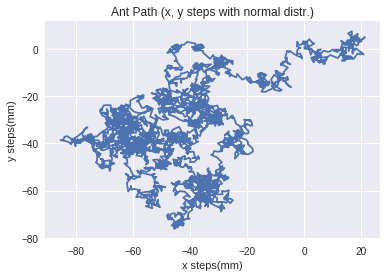

In [49]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def path():
  
  s = 0
  steps_x = [s]
  r = 0
  steps_y = [r]
  
  for i in range (3600):
    s += np.random.normal()
    steps_x.append(s)
    r += np.random.normal()
    steps_y.append(r)
 
  return (steps_x, steps_y)

plt.title('Ant Path (x, y steps with normal distr.)')
plt.xlabel('x steps(mm)')
plt.ylabel('y steps(mm)')
plt.plot(*path())

# Problem 1b

Let’s think about why ants need to perform path integration. Suppose that instead of path integration, when an ant found food, it just continued to wander with random steps until it got back to the nest. Using a simulation, find the probability that an ant who finds food after 1 hour will make its way back to within 10mm of the nest over the course of the next hour (note that if it comes within 10mm of a nest, it stops). Is this a good strategy? **Why or why not?**

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy

def path1B():
  
  s = 0
  steps_x = [s]
  r = 0
  steps_y = [r]  
  counter = 0
  
  '''first hour (home to food)'''
  for i in range (3600):
    s += np.random.normal()
    steps_x.append(s)
    r += np.random.normal()
    steps_y.append(r)
  
  '''creating new list with the start point as the last point reached at first hour'''
  s2 = steps_x[-1]
  steps_x2 = [s2]
  r2 = steps_y[-1]
  steps_y2 = [r2]
  
  '''second hour (food to home)'''
  for i in range (3600):
    s2 += np.random.normal()
    steps_x2.append(s2)
    r2 += np.random.normal()
    steps_y2.append(r2)
    if  ((s2)**2+(r2)**2)**0.5 <= 10:
      counter += 1
      break
        
  return counter

'''1000 trials to find probability'''
total = 0
i = 0

while i < 1000:
  total += path1B()
  i += 1
  
print(total/1000)

0.198


#### The probability that an ant, who finds food after 1 hour, will make its way back to within 10mm of the nest over the course of the next hour is approxamitely 20%. This is not a good strategy. The probability is too low, but, in terms of strategy, the ant would have to randomly walk however long the space it is on is which would take a considerable amount of time.

# Problem 1c

If the ant searches for an hour, finds food, and then searches for the nest by continuing to walk at random, what is the average closest distance it will come to the nest over the course of the next hour? (Do not assume it stops if it comes within 10mm) Find this with a simulation.



In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy

def path1C():
  distances = []
  
  for i in range(1000):
    s = 0
    steps_x = [s]
    r = 0
    steps_y = [r]  

    '''first hour (home to food)'''
    for i in range (3600):
      s += np.random.normal()
      steps_x.append(s)
      r += np.random.normal()
      steps_y.append(r)

    '''creating new list with the start point as the last point reached after first hour'''
    s2 = steps_x[-1]
    steps_x2 = [s2]
    r2 = steps_y[-1]
    steps_y2 = [r2]
    
    smallest = float('inf')
    
    for i in range (3600):
      s2 += np.random.normal()
      steps_x2.append(s2)
      r2 += np.random.normal()
      steps_y2.append(r2)
      d = (((steps_x2[-1])**2+(steps_y2[-1])**2)**0.5)
      if d < smallest:
          smallest = d
          
    distances.append(smallest) 
    
  print(np.average(distances))
  
path1C()

45.84956675142355


#### The average closest distance the ant will come to the nest over the course of the next hour is approxamitley 44-46mm

# Problem 2
Now let’s think about path integration. Assume that each step (x,y) is “remembered” (integrated) internally in the ant’s brain with a standard deviation on each component of S. Thus, if we store the total X component, it gets updated with a new x step via X ← X+x+ex where ex ~ Gaussian(0,S) and similarly for Y (Y ← Y+y+ ey with ey ~ Gaussian(0,S)). Suppose that, upon finding food after an hour (as above, one step per second), the ant then heads straight back to where it thinks the nest is (e.g. it travels back via the vector (-X,-Y)). Thus, the outbound trip is noisy, but the return trip is noiseless. Run a simulation to see how far the ant will end from the nest for various S from 1.0mm down to 0.0001mm. Plot the mean distance the ant ends from the nest as a function of S. Be sure to show a range of S values that make it clear what’s going on. 

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def path2(S):
  
  dist = 0
  
  for i in range(1000):
    X = 0 
    Y = 0
    s = 0
    steps_x = [s]
    r = 0
    steps_y = [r]
    
    for i in range (3600):
      snoise = np.random.normal()
      rnoise = np.random.normal()
      s += snoise
      r += rnoise
      X += snoise + np.random.normal(scale = S)
      Y += rnoise + np.random.normal(scale = S)
   
    s_diff = (X - s) 
    r_diff = (Y - r) 
    dist += sp.spatial.distance.euclidean([s_diff, r_diff], [0, 0]) 
    
  return dist/1000

print('''(S = 1) gives''', path2(1))
print('''(S = .1) gives''', path2(.1))
print('''(S = .01) gives''', path2(.01))
print('''(S = .001) gives''', path2(.001))
print('''(S = .0001) gives''', path2(.0001))


(S = 1) gives 74.7283843431434
(S = .1) gives 7.419260403433039
(S = .01) gives 0.7468409361825046
(S = .001) gives 0.07491475622142596
(S = .0001) gives 0.007587162812136959


#### (S = 1) gives 74.7283843431434 mm from nest
#### (S = .1) gives 7.419260403433039 mm from nest 
#### (S = .01) gives 0.7468409361825046 mm from nest
#### (S = .001) gives 0.07491475622142596 mm from nest
#### (S = .0001) gives 0.007587162812136959 mm from nest

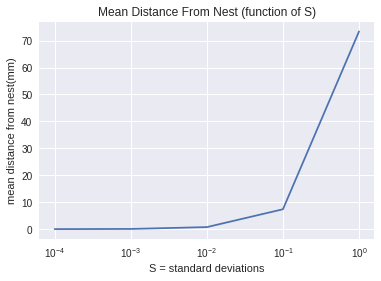

In [43]:
std= [1, .1, .01, .001, .0001]
result = [path2(1), path2(.1), path2(.01), path2(.001), path2(.0001)]

plt.title('Mean Distance From Nest (function of S)')
plt.ylabel('mean distance from nest(at end)(mm)')
plt.xlabel('S = standard deviations')
plt.plot(std, result)
plt.xscale('log')

# Problem 3a
Next, let’s just assume that it requires exp(0.1/S) energy units to run an integrator with a standard deviation of S for an hour. Suppose further that if you end up at a distance d from the nest after your return trip, it will take you d^2 energy units to find the nest. By using a simulation, plot the average energy expended while on a foraging trip (out for an hour and back) as a function of S. Be sure you have found a range of S to plot that shows the shape of the curve near its minimum.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


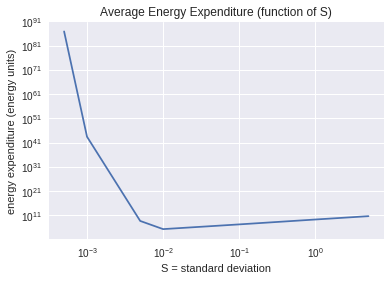

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def path3(S):
  
  dist = 0
  energy = []
  for i in range(1000):
    X = 0 
    Y = 0
    s = 0
    steps_x = [s]
    r = 0
    steps_y = [r]
    
    for i in range (3600):
      snoise = np.random.normal()
      rnoise = np.random.normal()
      s += snoise
      r += rnoise
      X += snoise + np.random.normal(scale = S)
      Y += rnoise + np.random.normal(scale = S)
   
    s_diff = (X - s) 
    r_diff = (Y - r) 
    dist += sp.spatial.distance.euclidean([s_diff, r_diff], [0, 0])
    energy.append(np.exp(0.1/S) + dist ** 2)
    
  return np.mean(energy)

std= [5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
result = [path3(5), path3(1), path3(0.5), path3(0.1), path3(0.05), path3(0.01), path3(0.005), path3(0.001), path3(0.0005), path3(0.0001)]

plt.title('Average Energy Expenditure (function of S)')
plt.ylabel('energy expenditure (energy units)')
plt.xlabel('S = standard deviation')
plt.plot(std, result)
plt.xscale("log")
plt.yscale("log")

# Problem 3b

What is the evolutionary significance of the minimum of the plot in 3a?

#### The energy expended is at its minimum at around a standard deviation of 0.01. So it seems, from an evolutionary perspective, having this amount of randomness would be optimal for the ant (in terms of energy expended) when on a foraging trip.